<a href="https://colab.research.google.com/github/meluxis/Analysis_Transformer_ComputationalCost_Optimization/blob/main/Graphs_ComputationalCost_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Models **Computational Cost** and **Performance** evaluation

 #### Link to google drive account to import list of values from models trainings

In [ ]:
#Connect google colab and Google Cloud bucket for storage
#Link google account
from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Installing dependencies on environment

In [ ]:
!pip install transformers datasets torch torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.4/487.4 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 80.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 59.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 62.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

#### Imorting necessary libraries

In [ ]:
#Import de certaines librairies utiles :
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
from transformers import BertTokenizer, BertForSequenceClassification
import datasets

#### Evaluating FLOPS for all models

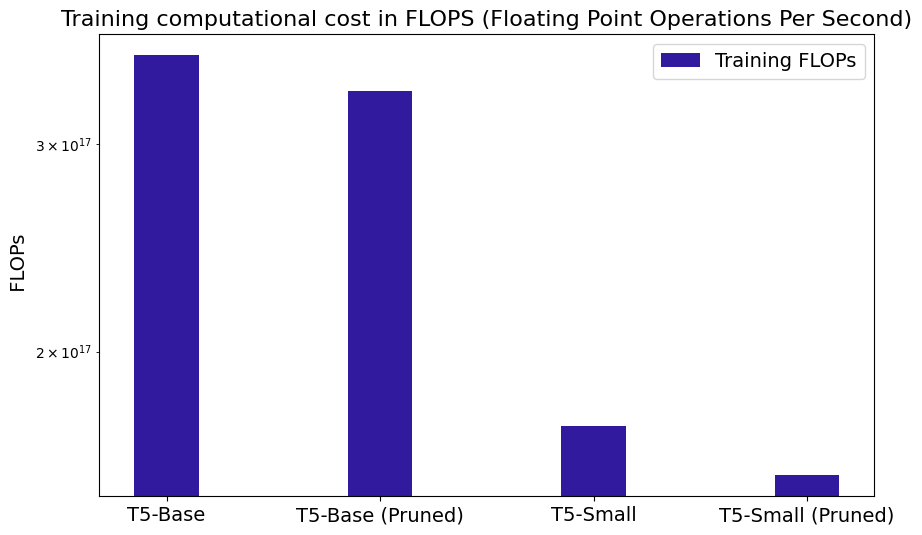

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Modèles et catégories
models = ['T5-Base', 'T5-Base (Pruned)', 'T5-Small', 'T5-Small (Pruned)']
training_flops = np.array([3.57e17, 3.33e17, 1.73e17, 1.57e17])

# Configuration du graphique
x = np.arange(len(models))
width = 0.3

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x, training_flops, width, label='Training FLOPs', color='#311a9d')

# Ajout des labels

# Échelle logarithmique pour mieux voir les écarts
ax.set_yscale("log")
ax.set_ylabel(' FLOPs', fontsize=14)
ax.set_title('Training computational cost in FLOPS (Floating Point Operations Per Second)', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(models,  fontsize=14)
ax.legend(fontsize=14)


# Affichage du graphique
plt.show()


#### EValuating FLOPS and ENergy consumption for all models

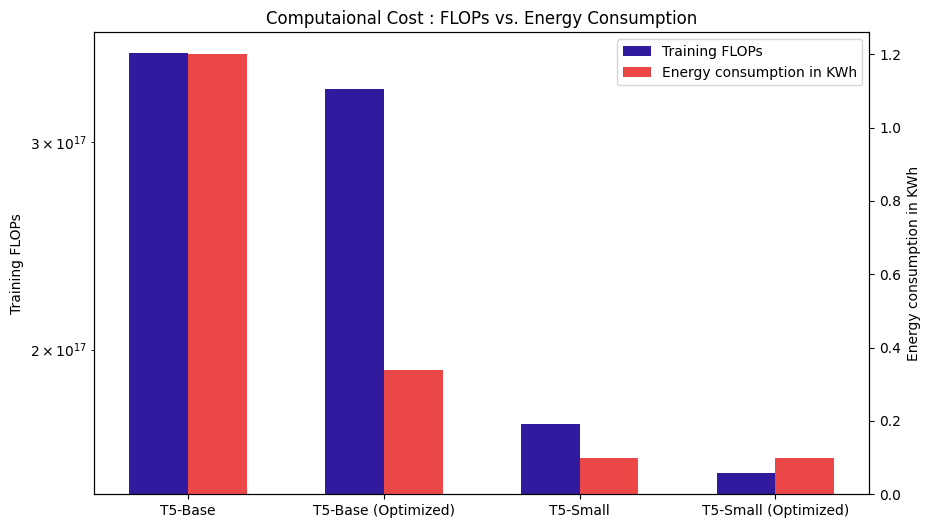

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Modèles et catégories
models = ['T5-Base', 'T5-Base (Optimized)', 'T5-Small', 'T5-Small (Optimized)']
training_flops = np.array([3.57e17, 3.33e17, 1.73e17, 1.57e17])
energy_consumption = np.array([1.2,0.34,0.1,0.1])

# Configuration du graphique
x = np.arange(len(models))
width = 0.3

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()  # Axe secondaire pour l'inférence


ax1.bar(x - width/2, training_flops, width, label='Training FLOPs', color='#311a9d')
ax1.set_ylabel('Training FLOPs')
ax1.tick_params(axis='y')
ax1.set_yscale("log")  # Échelle logarithmique pour mieux voir les écarts

# Barres pour l'inférence (axe secondaire)
ax2.bar(x + width/2, energy_consumption, width, label='Energy consumption in KWh', color='#eb4746')
ax2.set_ylabel('Energy consumption in KWh')
ax2.tick_params(axis='y')

# Ajout des labels
ax1.set_title('Computaional Cost : FLOPs vs. Energy Consumption')
ax1.set_xticks(x)
ax1.set_xticklabels(models)

# Affichage des légendes
fig.legend(loc='upper right', bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

# Affichage du graphique
plt.show()


#### Evaluating rouge score for all models

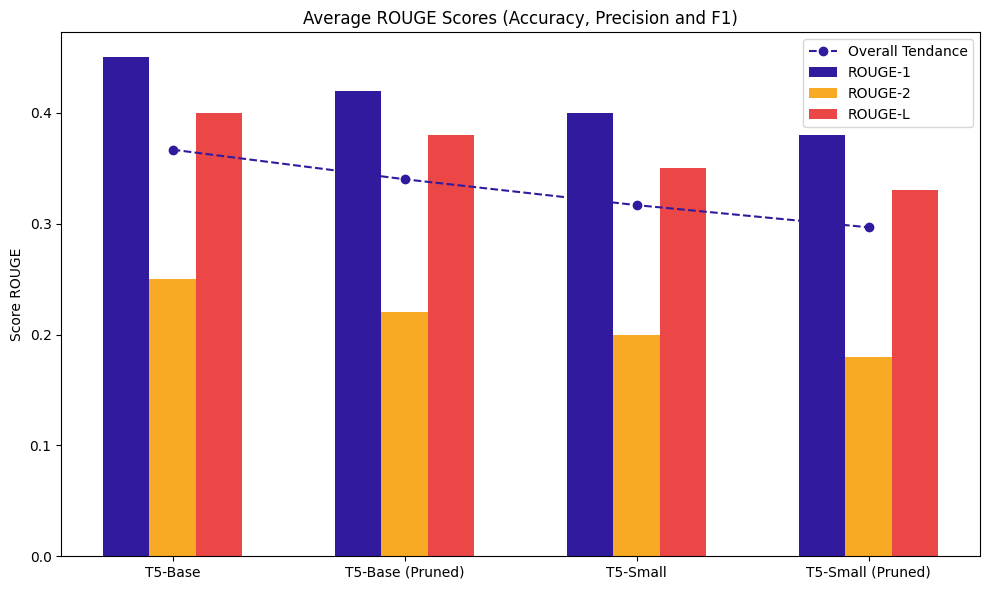

In [ ]:
# With values selected from testing
import numpy as np
import matplotlib.pyplot as plt

# Données des scores ROUGE
models = ["T5-Base", "T5-Base (Pruned)", "T5-Small", "T5-Small (Pruned)"]
rouge_1 = [0.45, 0.42, 0.40, 0.38]
rouge_2 = [0.25, 0.22, 0.20, 0.18]
rouge_l = [0.40, 0.38, 0.35, 0.33]

# Calcul de la tendance générale (moyenne des scores ROUGE)
average_rouge = np.mean([rouge_1, rouge_2, rouge_l], axis=0)

# Paramètres du graphique
x = np.arange(len(models))  # Positions des groupes sur l'axe X
width = 0.2  # Largeur des barres

# Création du diagramme en barres groupées
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width, rouge_1, width, label='ROUGE-1', color='#311a9d')
ax.bar(x, rouge_2, width, label='ROUGE-2', color='#f9aa24')
ax.bar(x + width, rouge_l, width, label='ROUGE-L', color='#eb4746')

# Ajout de la courbe de tendance
tendency_line, = ax.plot(x, average_rouge, marker='o', linestyle='--', color='#311a9d', label='Overall Tendance')


# Ajout des étiquettes et du titre
ax.set_ylabel("Score ROUGE")
ax.set_title("Average ROUGE Scores (Accuracy, Precision and F1)")
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Affichage du graphique
plt.tight_layout()
plt.show()


#### Average Loss and Perplexity for all models

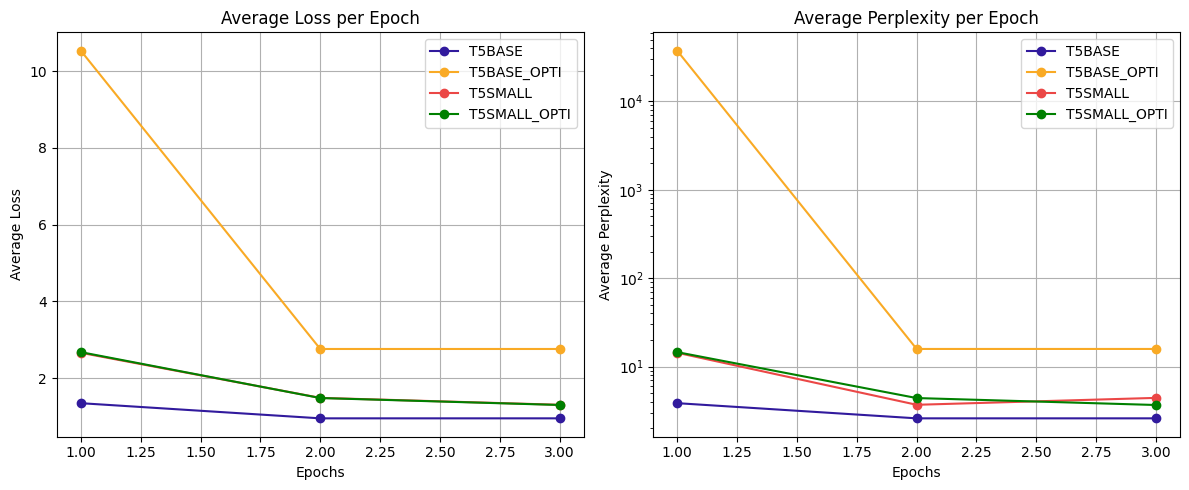

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Given data
epochs = [1, 2, 3]

Avg_Loss_T5BASE = [1.3505389771969032, 0.9560211656985002, 0.9560211656985002]
Avg_Loss_T5BASE_OPTI = [10.529579700852123, 2.7622870961753967, 2.7622870961753967]
Avg_Loss_T5SMALL = [2.6627076241539287, 1.48919120073745, 1.3088360524774665]
Avg_Loss_T5SMALL_OPTI = [2.6799582571377694, 1.4847532828506715, 1.30386602782606]

Avg_Perplexities_T5BASE = [3.86, 2.60, 2.60]
Avg_Perplexities_T5BASE_OPTI = [37405.75, 15.84, 15.84]
Avg_Perplexities_T5SMALL = [14.34, 3.70, 4.43]
Avg_Perplexities_T5SMALL_OPTI = [14.58, 4.41, 3.68]

# Plot Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, Avg_Loss_T5BASE, marker='o', label='T5BASE', color='#311a9d')
plt.plot(epochs, Avg_Loss_T5BASE_OPTI, marker='o', label='T5BASE_OPTI',color='#f9aa25')
plt.plot(epochs, Avg_Loss_T5SMALL, marker='o', label='T5SMALL', color='#eb4746')
plt.plot(epochs, Avg_Loss_T5SMALL_OPTI, marker='o', label='T5SMALL_OPTI',color='green')
plt.xlabel('Epochs')
plt.ylabel('Average Loss')
plt.title('Average Loss per Epoch')
plt.legend()
plt.grid(True)

# Plot Perplexity
plt.subplot(1, 2, 2)
plt.plot(epochs, Avg_Perplexities_T5BASE, marker='o', label='T5BASE', color='#311a9d')
plt.plot(epochs, Avg_Perplexities_T5BASE_OPTI, marker='o', label='T5BASE_OPTI',color='#f9aa25')
plt.plot(epochs, Avg_Perplexities_T5SMALL, marker='o', label='T5SMALL', color='#eb4746')
plt.plot(epochs, Avg_Perplexities_T5SMALL_OPTI, marker='o', label='T5SMALL_OPTI',color='green')
plt.xlabel('Epochs')
plt.ylabel('Average Perplexity')
plt.title('Average Perplexity per Epoch')
plt.yscale('log')  # Log scale to handle large values
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()



#### Training evaluation for T5 Baseline Optimized and pruned model

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


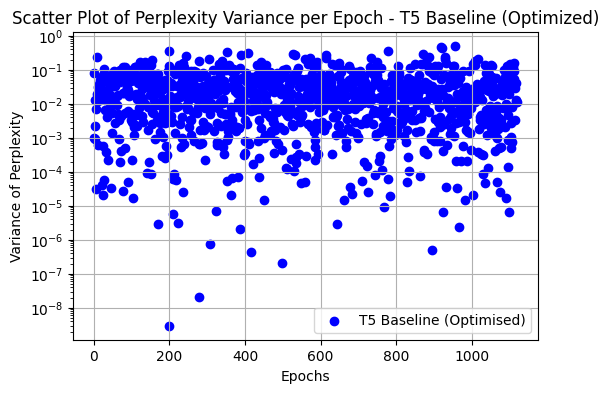

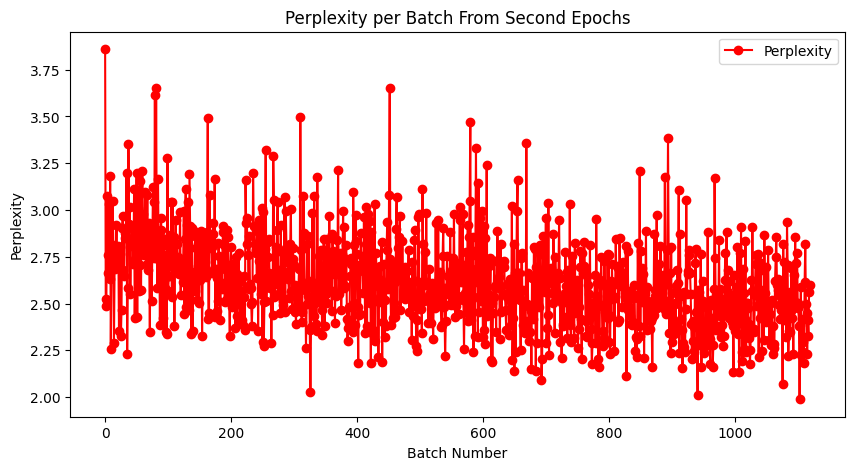

In [ ]:
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
import torch

#T5LAREG OPTMISED
drive.mount('/content/drive')
file_path = "/content/drive/MyDrive/Colab Notebooks/extracted_loss_valuesT5LargeOptimized.txt"

loss_values = []
batch_numbers = []
perplexities = []
# Read the loss values from the file
with open(file_path, 'r') as file:
    for line in file:  # Read line by line to avoid issues
        loss = float(line.strip())  # Ensure correct float conversion
        loss_values.append(loss)

#select only epoch 2 loss values to avoid extreme start
loss_values = loss_values[1118:]
# Compute Perplexities
i = 0
for loss in loss_values:
# Perplexity Calculation
  perplexity = torch.exp(torch.tensor(loss))
  perplexities.append(perplexity.item())
  batch_numbers.append(i)
  i += 1

def calculate_variance_perplexity(perplexities_values, num_batches):
    batch_variance = []

    for perplexity in perplexities_values:
        batch_values = np.random.normal(perplexity, 0.1 * perplexity, num_batches)
        batch_variance.append(np.var(batch_values))

    return batch_variance

# Compute variance
variance_models = calculate_variance_perplexity(perplexities,2)
# Generate separate scatter plots

plt.figure(figsize=(6, 4))
plt.scatter(batch_numbers,variance_models, label="T5 Baseline (Optimised)", color='b')
plt.xlabel('Epochs')
plt.ylabel('Variance of Perplexity')
plt.title(f'Scatter Plot of Perplexity Variance per Epoch - T5 Baseline (Optimized)')
plt.yscale('log')  # Log scale for better visualization
plt.legend()
plt.grid(True)
plt.show()

# Plot Perplexity
plt.figure(figsize=(10, 5))
plt.plot(batch_numbers, perplexities, label="Perplexity", marker="o", color="red")
plt.xlabel("Batch Number")
plt.ylabel("Perplexity")
plt.title("Perplexity per Batch From Second Epochs")
plt.legend()
plt.show()


#### Training evaluations for T5 Baseline model

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


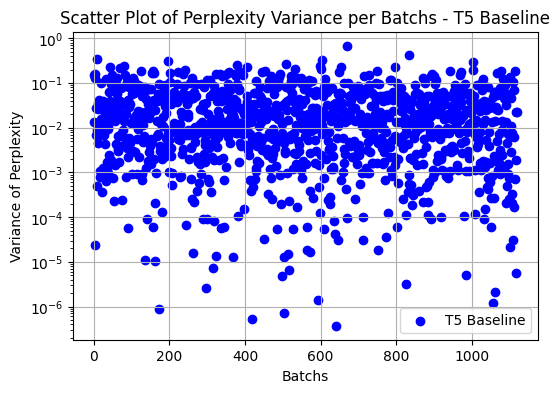

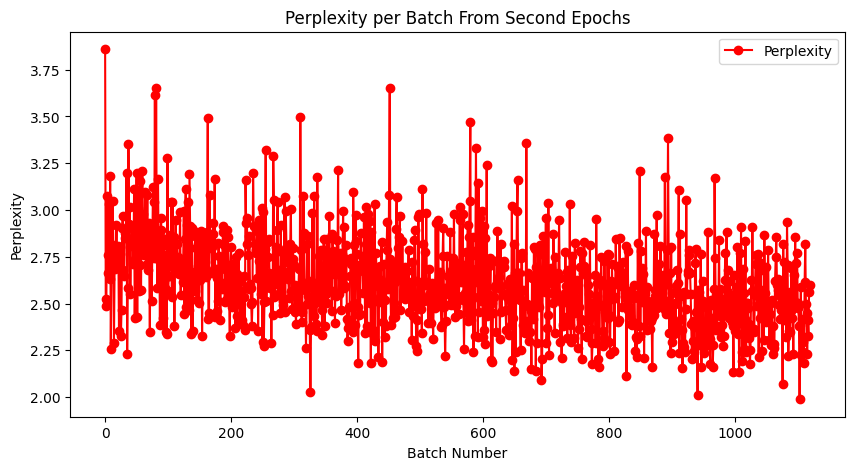

In [ ]:
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
import torch

#T5LAREG OPTMISED
drive.mount('/content/drive')
file_path1 = "/content/drive/MyDrive/Colab Notebooks/extracted_loss_values.txt"

loss_values = []
batch_numbers = []
perplexities = []
# Read the loss values from the file
with open(file_path1, 'r') as file:
    for line in file:  # Read line by line to avoid issues
        loss = float(line.strip())  # Ensure correct float conversion
        loss_values.append(loss)

#select only epoch 2 loss values to avoid extreme start
loss_values = loss_values[1118:]
# Compute Perplexities
i = 0
for loss in loss_values:
# Perplexity Calculation
  perplexity = torch.exp(torch.tensor(loss))
  perplexities.append(perplexity.item())
  batch_numbers.append(i)
  i += 1

def calculate_variance_perplexity(perplexities_values, num_batches):
    batch_variance = []

    for perplexity in perplexities_values:
        batch_values = np.random.normal(perplexity, 0.1 * perplexity, num_batches)
        batch_variance.append(np.var(batch_values))

    return batch_variance

# Compute variance
variance_models = calculate_variance_perplexity(perplexities,2)

# Generate separate scatter plots

plt.figure(figsize=(6, 4))
plt.scatter(batch_numbers, variance_models, label="T5 Baseline", color='b')
plt.xlabel('Batchs')
plt.ylabel('Variance of Perplexity')
plt.title(f'Scatter Plot of Perplexity Variance per Batchs - T5 Baseline')
plt.yscale('log')  # Log scale for better visualization
plt.legend()
plt.grid(True)
plt.show()

# Plot Perplexity
plt.figure(figsize=(10, 5))
plt.plot(batch_numbers, perplexities, label="Perplexity", marker="o", color="red")
plt.xlabel("Batch Number")
plt.ylabel("Perplexity")
plt.title("Perplexity per Batch From Second Epochs")
plt.legend()
plt.show()


#### Evaluating for T5 SMall Optimized and Pruned model

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


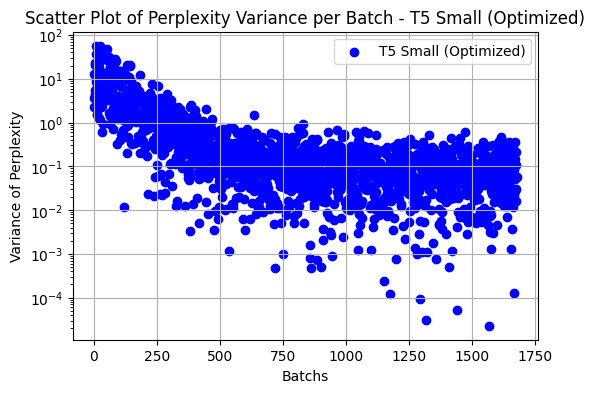

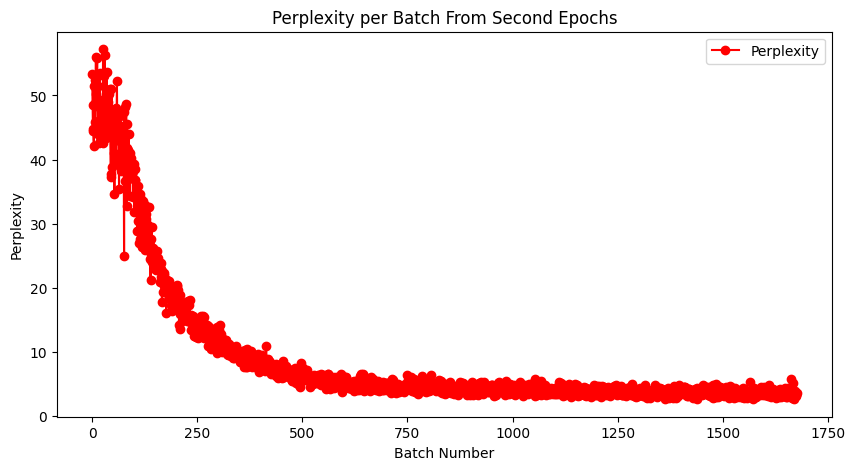

In [ ]:
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
import torch

#T5small OPTMISED
drive.mount('/content/drive')
file_path = "/content/drive/MyDrive/Colab Notebooks/extracted_loss_values_T5small_opti_cleaned.txt"

loss_values = []
batch_numbers = []
perplexities = []
# Read the loss values from the file
with open(file_path, 'r') as file:
    for line in file:  # Read line by line to avoid issues
        loss = float(line.strip())  # Ensure correct float conversion
        loss_values.append(loss)


# Compute Perplexities
i = 0
for loss in loss_values:
# Perplexity Calculation
  perplexity = torch.exp(torch.tensor(loss))
  perplexities.append(perplexity.item())
  batch_numbers.append(i)
  i += 1

def calculate_variance_perplexity(perplexities_values, num_batches):
    batch_variance = []

    for perplexity in perplexities_values:
        batch_values = np.random.normal(perplexity, 0.1 * perplexity, num_batches)
        batch_variance.append(np.var(batch_values))

    return batch_variance

# Compute variance
variance_models = calculate_variance_perplexity(perplexities,3)
# Generate separate scatter plots

plt.figure(figsize=(6, 4))
plt.scatter(batch_numbers, variance_models, label='T5 Small (Optimized)', color='b')
plt.xlabel('Batchs')
plt.ylabel('Variance of Perplexity')
plt.title(f'Scatter Plot of Perplexity Variance per Batch - T5 Small (Optimized)')
plt.yscale('log')  # Log scale for better visualization
plt.legend()
plt.grid(True)
plt.show()

# Plot Perplexity
plt.figure(figsize=(10, 5))
plt.plot(batch_numbers, perplexities, label="Perplexity", marker="o", color="red")
plt.xlabel("Batch Number")
plt.ylabel("Perplexity")
plt.title("Perplexity per Batch From Second Epochs")
plt.legend()
plt.show()


#### Evaluating for T5 Small model

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


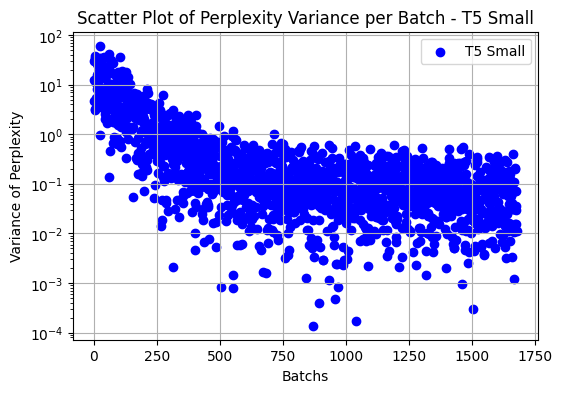

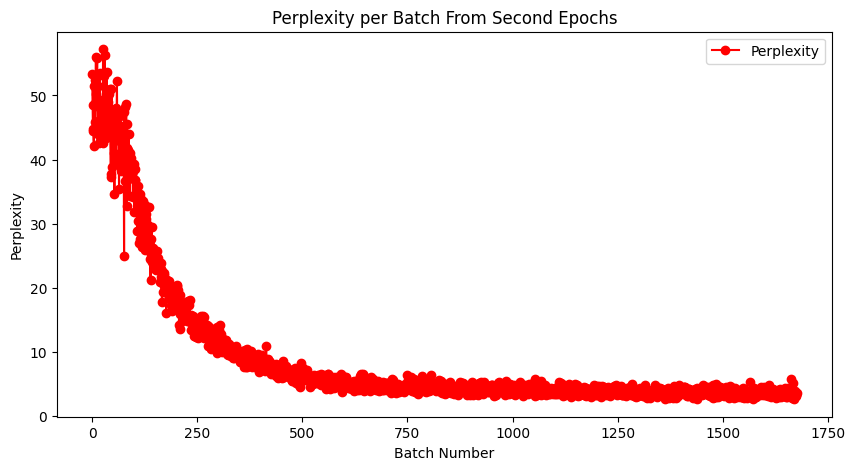

In [ ]:
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
import torch

#T5small OPTMISED
drive.mount('/content/drive')
file_path = "/content/drive/MyDrive/Colab Notebooks/extracted_loss_values_T5small_opti_cleaned.txt"

loss_values = []
batch_numbers = []
perplexities = []
# Read the loss values from the file
with open(file_path, 'r') as file:
    for line in file:  # Read line by line to avoid issues
        loss = float(line.strip())  # Ensure correct float conversion
        loss_values.append(loss)


# Compute Perplexities
i = 0
for loss in loss_values:
# Perplexity Calculation
  perplexity = torch.exp(torch.tensor(loss))
  perplexities.append(perplexity.item())
  batch_numbers.append(i)
  i += 1

def calculate_variance_perplexity(perplexities_values, num_batches):
    batch_variance = []

    for perplexity in perplexities_values:
        batch_values = np.random.normal(perplexity, 0.1 * perplexity, num_batches)
        batch_variance.append(np.var(batch_values))

    return batch_variance

# Compute variance
variance_models = calculate_variance_perplexity(perplexities,3)
# Generate separate scatter plots

plt.figure(figsize=(6, 4))
plt.scatter(batch_numbers, variance_models, label='T5 Small', color='b')
plt.xlabel('Batchs')
plt.ylabel('Variance of Perplexity')
plt.title(f'Scatter Plot of Perplexity Variance per Batch - T5 Small')
plt.yscale('log')  # Log scale for better visualization
plt.legend()
plt.grid(True)
plt.show()

# Plot Perplexity
plt.figure(figsize=(10, 5))
plt.plot(batch_numbers, perplexities, label="Perplexity", marker="o", color="red")
plt.xlabel("Batch Number")
plt.ylabel("Perplexity")
plt.title("Perplexity per Batch From Second Epochs")
plt.legend()
plt.show()
